In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
data = pd.read_csv("drug200.csv")

In [5]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [7]:
set(data["Drug"])

{'drugA', 'drugB', 'drugC', 'drugX', 'drugY'}

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [16]:
data["Sex"] = le.fit_transform(data["Sex"])

In [17]:
data["Cholesterol"] = le.fit_transform(data["Cholesterol"])

In [18]:
data["BP"] = le.fit_transform(data["BP"])

In [21]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [23]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]

In [24]:
y = data['Drug']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
D_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)

In [32]:
#help(DecisionTreeClassifier)

In [33]:
D_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
ypred = D_tree.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(ypred,y_test)

1.0

In [45]:
user_imput = [[53,1,1,1,55.355]]
D_tree.predict(user_imput)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)

In [47]:
from sklearn.tree import plot_tree

[Text(0.625, 0.9, 'x[4] <= 14.839\nentropy = 1.966\nsamples = 160\nvalue = [20, 14, 12, 38, 76]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.843\nsamples = 84\nvalue = [20, 14, 12, 38, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\nentropy = 0.977\nsamples = 34\nvalue = [20, 14, 0, 0, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\nentropy = 0.795\nsamples = 50\nvalue = [0, 0, 12, 38, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\nentropy = 0.999\nsamples = 25\nvalue = [0, 0, 12, 13, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

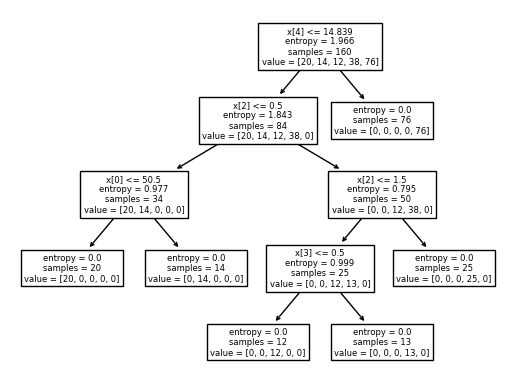

In [48]:
plot_tree(D_tree)

In [49]:
import pickle

In [50]:
with open ("decision_tree.pkl",'wb') as file:
    pickle.dump(D_tree,file)